### We study the differences between schools. First, regarding the velocities. Then, we obtain the "optimal path" of the route and compare with the real path in order to see that usually the participant takes a larger path to reach the destination. Finally, we obtain the tortuosity of the path and the pdf of the reorientation of the movement.

### We also use the three most data-rich schools for comparision purposes

# INDEX

    1. Velocities. Comparision between schools. Box plot
        1.1- Comparision between the 3 most data-rich schools
            
    2. Optimal path
        2.1- Comparision between the 3 most data-rich schools
        
    3. Tortuosity
        3.1- Comparision between the 3 most data-rich schools
    
    4. Reorientation
        4.1- Instantaneous velocity vs Reorientation
        4.2- Pdf. Fit with family of simmetric distributions
            4.2.1- Pdf with no interpolation
            4.2.2- Pdf with interpolation
        4.3- Comparision between the 3 most data-rich schools
        
        
Note: In all the cases we use the processed and interpolated data (uniformly separated by 1 second).
        
        

# 1. Velocities. Comparision between schools. Box plot


SGV
<v>= 1.4470459861327942  std= 0.6827623322181436  e= 0.005426101924411726
min v= 0.005756708134318524  max v= 8.152443072567843
15833
q1 (25%): 1.0481580944882116 m/s
q2 (50%): 1.409186880548036 m/s
q3 (75%): 1.780568764168083 m/s

-------------------------------------------------------------

BEL
<v>= 1.2561484270925842  std= 0.7931745392956769  e= 0.01233775274115548
min v= 0.01807821470771711  max v= 7.694505480627976
4133
q1 (25%): 0.7639016473685349 m/s
q2 (50%): 1.1972769832676506 m/s
q3 (75%): 1.582888291569536 m/s

-------------------------------------------------------------

SAN
<v>= 1.5041351528602513  std= 0.8885318590021845  e= 0.018073184378280406
min v= 0.05291767960647961  max v= 7.56525091617738
2417
q1 (25%): 0.9072825849279111 m/s
q2 (50%): 1.3977257758149335 m/s
q3 (75%): 1.9086250292131575 m/s

-------------------------------------------------------------

VER
<v>= 1.6060367499846935  std= 0.7396828668551645  e= 0.015688297920472737
min v= 0.02114350181019089 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

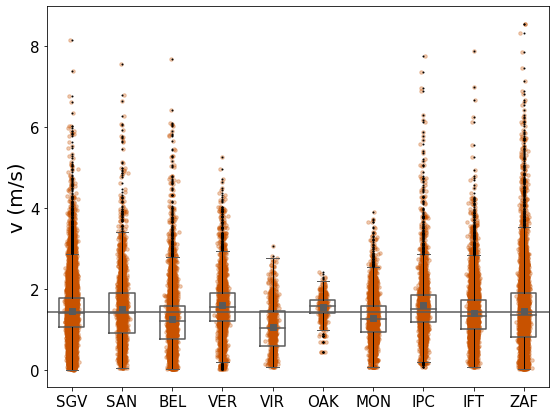

In [2]:
import numpy as np
import pylab as P
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
from random import choices
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__

plt.style.use('tableau-colorblind10')

plt.style.library['tableau-colorblind10']


P.figure(figsize=(9,7))

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


v_san=[]
v_sgv=[]
v_bel=[]      
v_ver=[]
v_vir=[]
v_oak=[]
v_ift=[]
v_ipc=[]
v_mon=[]
v_zaf=[]

sgv=0
san=0
bel=0
ver=0
vir=0
oak=0
mon=0
ift=0
ipc=0
zaf=0

velocities=[]


for file in all_files:   # Loop over all csv files in the folder/directory   
    
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])
    df2.index = df2['time']
    del df2['time']
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)

    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']

    v=df2['v'][~df2['v'].isnull()].tolist()
    velocities.extend(v)
    
    
    if 'sgv' in file:
        v_sgv.extend(v)
        sgv=sgv+1
        
    if 'san' in file:
        v_san.extend(v)
        san=san+1
        
    if 'bel' in file:
        v_bel.extend(v)
        bel=bel+1
        
    if 'ver' in file:
        v_ver.extend(v)
        ver=ver+1
        
    if 'vir' in file:
        v_vir.extend(v)
        vir=vir+1
        
    if 'oak' in file:
        v_oak.extend(v)
        oak=oak+1
        
    if 'ift' in file:
        v_ift.extend(v)
        ift=ift+1
        
    if 'ipc' in file:
        v_ipc.extend(v)
        ipc=ipc+1
        
    if 'zaf' in file:
        v_zaf.extend(v)
        zaf=zaf+1
        
    if 'mon' in file:
        v_mon.extend(v)
        mon=mon+1
    
        
# FOR EACH SCHOOL. COMPUTE THE MEAN, STD, ERROR, QUARTILES...FOR THE VELOCITIES-
# THEN PLOT THE PDF AND <V> AS A FUNCTION OF AT.
print('')
print('SGV')
mean = sum(v_sgv) / len(v_sgv)
variance = sum([((x - mean) ** 2) for x in v_sgv]) / len(v_sgv)
res = variance ** 0.5
error=res/(len(v_sgv)**0.5)

print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(v_sgv),'', 'max v=',max(v_sgv))
print(len(v_sgv))
q1=np.quantile(v_sgv, 0.25)
q2=np.quantile(v_sgv, 0.50)
q3=np.quantile(v_sgv, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('BEL')
mean2 = sum(v_bel) / len(v_bel)
variance2 = sum([((x2 - mean2) ** 2) for x2 in v_bel]) / len(v_bel)
res2 = variance2 ** 0.5
error2=res2/(len(v_bel)**0.5)

print('<v>=',mean2, '', 'std=',res2, '', 'e=',error2)
print('min v=',min(v_bel),'', 'max v=',max(v_bel))
print(len(v_bel))
q1=np.quantile(v_bel, 0.25)
q2=np.quantile(v_bel, 0.50)
q3=np.quantile(v_bel, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('SAN')
mean3 = sum(v_san) / len(v_san)
variance3 = sum([((x3 - mean3) ** 2) for x3 in v_san]) / len(v_san)
res3 = variance3 ** 0.5
error3=res3/(len(v_san)**0.5)

print('<v>=',mean3, '', 'std=',res3, '', 'e=',error3)
print('min v=',min(v_san),'', 'max v=',max(v_san))
print(len(v_san))
q1=np.quantile(v_san, 0.25)
q2=np.quantile(v_san, 0.50)
q3=np.quantile(v_san, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('VER')
mean4 = sum(v_ver) / len(v_ver)
variance4 = sum([((x4 - mean4) ** 2) for x4 in v_ver]) / len(v_ver)
res4 = variance4 ** 0.5
error4=res4/(len(v_ver)**0.5)

print('<v>=',mean4, '', 'std=',res4, '', 'e=',error4)
print('min v=',min(v_ver),'', 'max v=',max(v_ver))
print(len(v_ver))
q1=np.quantile(v_ver, 0.25)
q2=np.quantile(v_ver, 0.50)
q3=np.quantile(v_ver, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')

print('VIR')
mean5 = sum(v_vir) / len(v_vir)
variance5 = sum([((x5 - mean5) ** 2) for x5 in v_vir]) / len(v_vir)
res5 = variance5 ** 0.5
error5=res5/(len(v_vir)**0.5)

print('<v>=',mean5, '', 'std=',res5, '', 'e=',error5)
print('min v=',min(v_vir),'', 'max v=',max(v_vir))
print(len(v_vir))
q1=np.quantile(v_vir, 0.25)
q2=np.quantile(v_vir, 0.50)
q3=np.quantile(v_vir, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')



print('MON')
mean6 = sum(v_mon) / len(v_mon)
variance6 = sum([((x6 - mean6) ** 2) for x6 in v_mon]) / len(v_mon)
res6 = variance6 ** 0.5
error6=res6/(len(v_mon)**0.5)

print('<v>=',mean6, '', 'std=',res6, '', 'e=',error6)
print('min v=',min(v_mon),'', 'max v=',max(v_mon))
print(len(v_mon))
q1=np.quantile(v_mon, 0.25)
q2=np.quantile(v_mon, 0.50)
q3=np.quantile(v_mon, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('OAK')
mean7 = sum(v_oak) / len(v_oak)
variance7 = sum([((x7 - mean7) ** 2) for x7 in v_oak]) / len(v_oak)
res7 = variance7 ** 0.5
error7=res7/(len(v_oak)**0.5)

print('<v>=',mean7, '', 'std=',res7, '', 'e=',error7)
print('min v=',min(v_oak),'', 'max v=',max(v_oak))
print(len(v_oak))
q1=np.quantile(v_oak, 0.25)
q2=np.quantile(v_oak, 0.50)
q3=np.quantile(v_oak, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('IPC')
mean8 = sum(v_ipc) / len(v_ipc)
variance8 = sum([((x8 - mean8) ** 2) for x8 in v_ipc]) / len(v_ipc)
res8 = variance8 ** 0.5
error8=res8/(len(v_ipc)**0.5)

print('<v>=',mean8, '', 'std=',res8, '', 'e=',error8)
print('min v=',min(v_ipc),'', 'max v=',max(v_ipc))
print(len(v_ipc))
q1=np.quantile(v_ipc, 0.25)
q2=np.quantile(v_ipc, 0.50)
q3=np.quantile(v_ipc, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('IFT')
mean9 = sum(v_ift) / len(v_ift)
variance9 = sum([((x9 - mean9) ** 2) for x9 in v_ift]) / len(v_ift)
res9 = variance9 ** 0.5
error9=res9/(len(v_ift)**0.5)

print('<v>=',mean9, '', 'std=',res9, '', 'e=',error9)
print('min v=',min(v_ift),'', 'max v=',max(v_ift))
print(len(v_ift))
q1=np.quantile(v_ift, 0.25)
q2=np.quantile(v_ift, 0.50)
q3=np.quantile(v_ift, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('ZAF')
mean10 = sum(v_zaf) / len(v_zaf)
variance10 = sum([((x10 - mean10) ** 2) for x10 in v_zaf]) / len(v_zaf)
res10 = variance10 ** 0.5
error10=res10/(len(v_zaf)**0.5)

print('<v>=',mean10, '', 'std=',res10, '', 'e=',error10)
print('min v=',min(v_zaf),'', 'max v=',max(v_zaf))
print(len(v_zaf))
q1=np.quantile(v_zaf, 0.25)
q2=np.quantile(v_zaf, 0.50)
q3=np.quantile(v_zaf, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')



print('TOTES')
mean_totes = sum(velocities) / len(velocities)
variance_totes = sum([((x_totes - mean_totes) ** 2) for x_totes in velocities]) / len(velocities)
res_totes = variance_totes ** 0.5
error_totes=res_totes/(len(velocities)**0.5)

print('<v>=',mean_totes, '', 'std=',res_totes, '', 'e=',error_totes)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print(len(velocities))
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


values=[v_sgv,v_san,v_bel,v_ver,v_vir,v_oak,v_mon,v_ipc,v_ift,v_zaf] 

#names=[r'$\Delta t = 1 s$',r'$1 \leq \Delta t \leq 2 s$', r'$2 \leq \Delta t \leq 3 s$', r'$3 \leq \Delta t \leq 4 s$',r'$4 \leq \Delta t \leq 5 s$']
names=['SGV', 'SAN', 'BEL', 'VER', 'VIR', 'OAK', 'MON', 'IPC', 'IFT', 'ZAF']

medianprops = dict(linewidth=1.5, linestyle='-', color='#595959')
meanprops=dict(marker="s",markerfacecolor='#595959', markeredgecolor='#595959')
boxprops = dict(linestyle='-', linewidth=1.5, color='#595959')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
capprops = dict(color='#595959')



palette = ['#006BA4', '#FF800E', '#ABABAB', '#595959','#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
palette2 = ['#C85200', '#C85200', '#C85200', '#C85200', '#C85200', '#C85200', '#C85200', '#C85200', '#C85200', '#C85200']

for i in range(len(names)):
    y=values[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    P.plot(x, y, '.', ms=7,alpha=0.3,color=palette2[i])
    
P.axhline(y= mean_totes, color='#595959')  

P.boxplot(values, labels=names,showmeans=True,boxprops=boxprops,meanprops=meanprops,medianprops=medianprops,flierprops=flierprops,capprops=capprops)
#P.xlabel('School',fontsize=18)
P.ylabel('v (m/s)',fontsize=20)
P.xticks(fontsize=15)
P.yticks(fontsize=15)

In [5]:
print('number of participants of each school:')
print('sgv:',sgv, 'san:',san,'bel:',bel,'ver:',ver,'vir:',vir,'oak:',oak,'mon:',mon,'ipc:',ipc,'ift:',ift,'zaf:',zaf)
print('')
print('Total number of participants:',sgv+san+bel+ver+vir+oak+mon+ipc+ift+zaf)
print('')
print('Total number of GPS locations:',len(v_sgv)+len(v_san)+len(v_bel)+len(v_ver)+len(v_vir)+len(v_oak)+len(v_mon)+len(v_ipc)+len(v_ift)+len(v_zaf))

number of participants of each school:
sgv: 28 san: 6 bel: 7 ver: 3 vir: 2 oak: 1 mon: 6 ipc: 7 ift: 10 zaf: 13

Total number of participants: 83

Total number of GPS locations: 44579


## 1.1- Comparision between the 3 most data-rich schools

We use only the data of:

    IFT (Institut Ferran Tallada: 6,170 GPS locs.)
    SGV (Sant Gabriel de Viladecans: 15,861 GPS locs)
    ZAF (Juan Manuel Zafra: 6,115 GPS locs).


SGV
<v>= 1.4470459861327942  std= 0.6827623322181436  e= 0.005426101924411726
min v= 0.005756708134318524  max v= 8.152443072567843
15833
q1 (25%): 1.0481580944882116 m/s
q2 (50%): 1.409186880548036 m/s
q3 (75%): 1.780568764168083 m/s

-------------------------------------------------------------

IFT
<v>= 1.4092321137608195  std= 0.6591462165759514  e= 0.008398300450616764
min v= 0.068410144018363  max v= 7.883511221903111
6160
q1 (25%): 0.9996533549272489 m/s
q2 (50%): 1.3366476412731068 m/s
q3 (75%): 1.7340205717046295 m/s

-------------------------------------------------------------

ZAF
<v>= 1.448003487295711  std= 0.9873374714054198  e= 0.012639489050385288
min v= 0.02398131423735949  max v= 8.566491492517326
6102
q1 (25%): 0.7986026824621189 m/s
q2 (50%): 1.3602099835680765 m/s
q3 (75%): 1.8881286711328602 m/s

-------------------------------------------------------------



(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

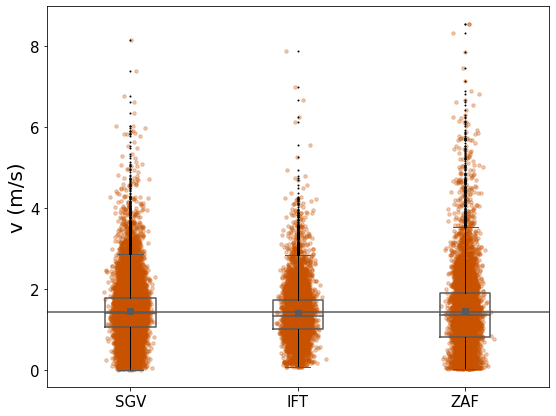

In [6]:
import numpy as np
import pylab as P
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
from random import choices
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__

plt.style.use('tableau-colorblind10')

plt.style.library['tableau-colorblind10']


P.figure(figsize=(9,7))

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)



v_sgv=[]
v_ift=[]
v_zaf=[]

sgv=0
ift=0
zaf=0

velocities=[]


for file in all_files:   # Loop over all csv files in the folder/directory   
    
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])
    df2.index = df2['time']
    del df2['time']
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)

    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']

    v=df2['v'][~df2['v'].isnull()].tolist()
    velocities.extend(v)
    
    
    if 'sgv' in file:
        v_sgv.extend(v)
        sgv=sgv+1
        
    if 'ift' in file:
        v_ift.extend(v)
        ift=ift+1
        
    if 'zaf' in file:
        v_zaf.extend(v)
        zaf=zaf+1
        
    
        
# FOR EACH SCHOOL. COMPUTE THE MEAN, STD, ERROR, QUARTILES...FOR THE VELOCITIES-
# THEN PLOT THE PDF AND <V> AS A FUNCTION OF AT.
print('')
print('SGV')
mean = sum(v_sgv) / len(v_sgv)
variance = sum([((x - mean) ** 2) for x in v_sgv]) / len(v_sgv)
res = variance ** 0.5
error=res/(len(v_sgv)**0.5)

print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(v_sgv),'', 'max v=',max(v_sgv))
print(len(v_sgv))
q1=np.quantile(v_sgv, 0.25)
q2=np.quantile(v_sgv, 0.50)
q3=np.quantile(v_sgv, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('IFT')
mean9 = sum(v_ift) / len(v_ift)
variance9 = sum([((x9 - mean9) ** 2) for x9 in v_ift]) / len(v_ift)
res9 = variance9 ** 0.5
error9=res9/(len(v_ift)**0.5)

print('<v>=',mean9, '', 'std=',res9, '', 'e=',error9)
print('min v=',min(v_ift),'', 'max v=',max(v_ift))
print(len(v_ift))
q1=np.quantile(v_ift, 0.25)
q2=np.quantile(v_ift, 0.50)
q3=np.quantile(v_ift, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('ZAF')
mean10 = sum(v_zaf) / len(v_zaf)
variance10 = sum([((x10 - mean10) ** 2) for x10 in v_zaf]) / len(v_zaf)
res10 = variance10 ** 0.5
error10=res10/(len(v_zaf)**0.5)

print('<v>=',mean10, '', 'std=',res10, '', 'e=',error10)
print('min v=',min(v_zaf),'', 'max v=',max(v_zaf))
print(len(v_zaf))
q1=np.quantile(v_zaf, 0.25)
q2=np.quantile(v_zaf, 0.50)
q3=np.quantile(v_zaf, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')



values=[v_sgv,v_ift,v_zaf] 

names=['SGV', 'IFT', 'ZAF']

medianprops = dict(linewidth=1.5, linestyle='-', color='#595959')
meanprops=dict(marker="s",markerfacecolor='#595959', markeredgecolor='#595959')
boxprops = dict(linestyle='-', linewidth=1.5, color='#595959')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
capprops = dict(color='#595959')

palette2 = ['#C85200', '#C85200', '#C85200']

for i in range(len(names)):
    y=values[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    P.plot(x, y, '.', ms=7,alpha=0.3,color=palette2[i])
    
P.axhline(y= mean_totes, color='#595959')  

P.boxplot(values, labels=names,showmeans=True,boxprops=boxprops,meanprops=meanprops,medianprops=medianprops,flierprops=flierprops,capprops=capprops)
#P.xlabel('School',fontsize=18)
P.ylabel('v (m/s)',fontsize=20)
P.xticks(fontsize=15)
P.yticks(fontsize=15)

# 2. Optimal path

Using the library "openrouteservice" we obtain the optimal path (from OpenStreetMaps) between two GPS locations (initial and final). Then we compare with the real path, computed by adding up all small distance increments.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import openrouteservice
from openrouteservice import convert
import networkx as nx
import osmnx as ox

all_files = glob.glob(os.path.join("*.csv")) #make list of paths (csv files for all individuals)

initial_time=[]
final_time=[]
initial_lat=[]
initial_lon=[]
final_lat=[]
final_lon=[]
names=[]
times=[]
distances=[]
velocities=[]
velocities_mean=[]
distances_maps=[]
times_maps=[]
velocities_maps=[]

for file in all_files:   #loop over all csv files in the folder/directory   
    df = pd.read_csv(file)   #read the file
    df2=df.copy() 
    
    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])
    df2.index = df2['time']
    del df2['time']
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)

    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']

    
    initial_time.append(df2['time'][0])
    final_time.append(df2['time'].iloc[-1])
    initial_lat.append(df2['latitude'][0])
    initial_lon.append(df2['latitude'][0])
    final_lat.append(df2['latitude'].iloc[-1])
    final_lon.append(df2['longitude'].iloc[-1])
    distances.append(df2['d'].sum())
    times.append((df2['time'].iloc[-1]-df2['time'][0]).total_seconds())
    names.append(file)
    velocities.append(df2['d'].sum()/((df2['time'].iloc[-1]-df2['time'][0]).total_seconds()))
    velocities_mean.append(df2['d'].sum()/len(df2['d']))
    
    coords = ((df2['longitude'][0],df2['latitude'][0]),(df2['longitude'].iloc[-1],df2['latitude'].iloc[-1]))
    client = openrouteservice.Client(key='5b3ce3597851110001cf6248ca680544cc7648e6a05195f4e837eb34') # Specify your personal API key
    routes = client.directions(coords,profile='foot-walking')
    geometry = client.directions(coords,profile='foot-walking')['routes'][0]['geometry']
    decoded = convert.decode_polyline(geometry)
    distances_maps.append(routes['routes'][0]['summary']['distance'])
    times_maps.append(routes['routes'][0]['summary']['duration'])
    velocities_maps.append(routes['routes'][0]['summary']['distance']/routes['routes'][0]['summary']['duration'])
    

        
df3 = pd.DataFrame(            
    {'names': names,
     'initial_time': initial_time,
     'final_time': final_time,
     'initial_lat': initial_lat,
     'initial_lon': initial_lon,
     'final_lat': final_lat,
     'final_lon': final_lon,
     'distance': distances,
     'time': times,
     'velocities': velocities,
     '<velocities>': velocities_mean,
     'distances_maps':distances_maps,
     'times_maps':times_maps,
     'velocities_maps':velocities_maps
    })



pd.set_option('display.max_rows', None)
df3


C:\Users\josep\anaconda3\envs\ox\lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\josep\anaconda3\envs\ox\lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\josep\anaconda3\envs\ox\lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\josep\anaconda3\envs\ox\lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 4th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\josep\anaconda3\envs\ox\lib\site-pa

,names,initial_time,final_time,initial_lat,initial_lon,final_lat,final_lon,distance,time,velocities,<velocities>,distances_maps,times_maps,velocities_maps
0,2018-11-05_sgv_0101_PEU.csv,2018-11-05 18:22:14,2018-11-05 18:49:25,41.315380,41.315380,41.321865,2.021088,1861.700165,1631.0,1.141447,1.140748,977.3,703.7,1.388802
1,2018-11-05_sgv_0102_peu.csv,2018-11-08 18:35:11,2018-11-08 18:43:40,41.317076,41.317076,41.321908,2.021384,666.842139,509.0,1.310102,1.307534,806.0,580.3,1.388937
2,2018-11-05_sgv_0201_peu.csv,2018-11-05 18:15:54,2018-11-05 18:25:20,41.315713,41.315713,41.320492,2.022782,914.103460,566.0,1.615024,1.612175,694.6,500.1,1.388922
3,2018-11-05_sgv_0202_peu.csv,2018-11-08 17:11:00,2018-11-08 17:18:45,41.315749,41.315749,41.320622,2.023442,860.294093,465.0,1.850095,1.846125,712.2,512.8,1.388846
4,2018-11-05_sgv_0203_peu.csv,2018-11-09 18:11:29,2018-11-09 18:20:13,41.316171,41.316171,41.320534,2.022531,816.337441,524.0,1.557896,1.554928,642.9,462.9,1.388853
5,2018-11-05_sgv_0801_peu.csv,2018-11-08 17:32:08,2018-11-08 17:45:20,41.320198,41.320198,41.312540,2.024510,1124.251149,792.0,1.419509,1.417719,1125.9,810.6,1.388971
6,2018-11-05_sgv_0804_peu.csv,2018-11-10 18:21:23,2018-11-10 18:27:58,41.319158,41.319158,41.314096,2.023976,709.126054,395.0,1.795256,1.790722,704.4,507.2,1.388801
7,2018-11-05_sgv_0901_peu.csv,2018-11-10 18:20:15,2018-11-10 18:27:57,41.320081,41.320081,41.314186,2.023823,795.571586,462.0,1.722016,1.718297,822.1,591.9,1.388917
8,2018-11-05_sgv_1103_peu.csv,2018-11-10 19:53:56,2018-11-10 20:07:44,41.320280,41.320280,41.314490,2.025636,909.421004,828.0,1.098335,1.097010,883.8,636.3,1.388967
9,2018-11-05_sgv_1104_peu.csv,2018-11-10 21:25:28,2018-11-10 21:27:58,41.313254,41.313254,41.314403,2.026124,213.317355,150.0,1.422116,1.412698,433.0,311.8,1.388711


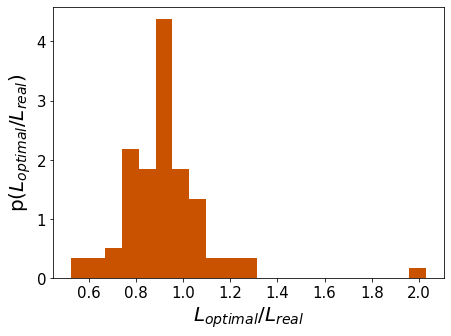

< Loptimal / Lreal >= 0.9208641359352819 +- 0.002270206446840609
std Loptimal / Lreal= 0.18842713508777056


In [49]:
fig, ax1 = plt.subplots(figsize=(7,5)) 
df3['ratio_optim']=df3['distances_maps']/df3['distance']
plt.hist(df3['ratio_optim'], bins = 'auto', density=True, color='#C85200')
plt.xlabel(r'$L_{optimal}/L_{real}$',fontsize = 20)
plt.ylabel(r'p($L_{optimal}/L_{real}$)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


ratio_optim=df3['ratio_optim'].tolist()

mean_ratio_optim=np.mean(ratio_optim)
std_ratio_optim=np.std(ratio_optim)
error_ratio_optim=np.std(ratio_optim)/len(ratio_optim)

print('< Loptimal / Lreal >=', mean_ratio_optim, '+-', error_ratio_optim)
print('std Loptimal / Lreal=', std_ratio_optim)

## 2.1- Comparision between the 3 most data-rich schools


We use only the data of:

    IFT (Institut Ferran Tallada: 6,170 GPS locs.)
    SGV (Sant Gabriel de Viladecans: 15,861 GPS locs)
    ZAF (Juan Manuel Zafra: 6,115 GPS locs).

In [51]:
ratio_optim_sgv=[]
ratio_optim_ift=[]
ratio_optim_zaf=[]
for i in range(len(df3['ratio_optim'])):
    if 'sgv' in df3['names'][i]:
        ratio_optim_sgv.append(df3['ratio_optim'][i])
        
    if 'ift' in df3['names'][i]:
        ratio_optim_ift.append(df3['ratio_optim'][i])
        
    if 'zaf' in df3['names'][i]:
        ratio_optim_zaf.append(df3['ratio_optim'][i])

mean_ratio_optim_sgv=np.mean(ratio_optim_sgv)
std_ratio_optim_sgv=np.std(ratio_optim_sgv)
error_ratio_optim_sgv=np.std(ratio_optim_sgv)/len(ratio_optim_sgv)
print('SGV')       
print('< Loptimal / Lreal >=', mean_ratio_optim_sgv, '+-', error_ratio_optim_sgv)
print('std Loptimal / Lreal=', std_ratio_optim_sgv)
print('')
print('----------------------------')
print('')

mean_ratio_optim_ift=np.mean(ratio_optim_ift)
std_ratio_optim_ift=np.std(ratio_optim_ift)
error_ratio_optim_ift=np.std(ratio_optim_ift)/len(ratio_optim_ift)
print('IFT')       
print('< Loptimal / Lreal >=', mean_ratio_optim_ift, '+-', error_ratio_optim_ift)
print('std Loptimal / Lreal=', std_ratio_optim_ift)
print('')
print('----------------------------')
print('')

mean_ratio_optim_zaf=np.mean(ratio_optim_zaf)
std_ratio_optim_zaf=np.std(ratio_optim_zaf)
error_ratio_optim_zaf=np.std(ratio_optim_zaf)/len(ratio_optim_zaf)
print('ZAF')       
print('< Loptimal / Lreal >=', mean_ratio_optim_zaf, '+-', error_ratio_optim_zaf)
print('std Loptimal / Lreal=', std_ratio_optim_zaf)
print('')
print('----------------------------')
print('')

SGV
< Loptimal / Lreal >= 0.9967735122614031 +- 0.009312231275321381
std Loptimal / Lreal= 0.26074247570899867

----------------------------

IFT
< Loptimal / Lreal >= 0.9056271781180432 +- 0.011892948465414254
std Loptimal / Lreal= 0.11892948465414255

----------------------------

ZAF
< Loptimal / Lreal >= 0.855970831550873 +- 0.006891121284883117
std Loptimal / Lreal= 0.08958457670348052

----------------------------



# 3. Tortuosity

 Steps:
 
    1. At each point, we calculate the straight vector from the current point to the end point (goal).
    
    2. At each point, we compute the reorientation angle between the straight vector and the current vector of movement.
    
    3. Then we calculate the cosinus of all the obtained angles and average.
    
    
    Note: We perform this operation for several values of "s", being "s" the number of steps between GPS locations. 
    So, if s=0, we are obtaining the vectors (and the reorientation and tortuosity) between each consecutive GPS location (i and i+1). If s=1, we make a step in our data, so we compute the vector between the geo-locations separated by 2 seconds (between i and i+2). If s=2, we make two steps.. and so on. 

In [11]:
from scipy.special import lpmn
import pandas as pd
import numpy as np
#from mpmath import *
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import lpmn,jv,lpmv
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter, MultipleLocator


def orientation(latitude0,longitude0,latitude1,longitude1):
    """ Given two points that form a vector: origin p0 and destination p1, get their angle (uniquely defined)
    
    Input:
        - origin latitude and longitude (latitude0, longitude0)
        - destination latitude and longitude (latitude1, longitude1)
    
    Output:
        - orientation angle between the vector and the x-coordenate (in radians)
    
    Note: The returned angle is in the range between 0 and 2·pi in counter-clockwise direction
    
    """
    
    p0=(latitude0,longitude0)   #first define the points: p0=(latitude0, longitude0) and p1=(latitude1,longitude1)
    p1=(latitude1,longitude1)
    p=np.array(p1)-np.array(p0)
    
    a=np.arctan2(p[1],p[0])         # orientation angle between 0 and 2·pi
    if a < 0.0:
        b=2*np.pi + a
        return b
    else:
        return a


    
    
def vector(latitude0,longitude0,latitude1,longitude1): 
    """ Given two points: origin p0 and destionation p1, get their vector coordenates 
    
    Input:
        - origin latitude and longitude (latitude0, longitude0)
        - destination latitude and longitude (latitude1, longitude1)
        
    Output:
        - vector coordinates between origin and destination points
    
    """
    
    p0=(latitude0,longitude0)   # first define the points: p0=(latitude0, longitude0) and p1=(latitude1,longitude1)
    p1=(latitude1,longitude1)
    vec=(p1[0]-p0[0], p1[1]-p0[1]) #vector
    return vec




def determinant(vec0,vec1):
    """ Given two vectors, compute the determinant. If det<0 means that the second vector has turned in the clockwise direction
    
    Input:
        - two consecutive vectors vec0 and vec1
        
    Output:
        - determinant
    """
    
    det=vec0[0]*vec1[1]-vec0[1]*vec1[0]
    return det



# Obtain the angle between two consecutive vectors (change in orientation, reorientation, turning angle).
# This angle is <0 if det<0 (clockwise) and >0 if counter clockwise
def reorientation(vec0,vec1):
    """ Given two vectors, obtain the change in the orientation (turning angle) in radians between 0 and 2·pi
        We consider a negative angle if the determinant is <0 (clockwise) and positive angle (det>0) if counter-clockwise
        
    Input:
        - two consecutive vectors vec0 and vec1
    
    Output:
        - reorientation angle (turning angle) between vectors in degrees (0 to 2·pi counter-clockwise and 0 to -2·pi clockwise)
    
    """
    
    unit_vec0=vec0/np.linalg.norm(vec0)
    unit_vec1=vec1/np.linalg.norm(vec1)
    dot_product=np.dot(unit_vec0,unit_vec1)
    a=np.arccos(dot_product)
    det=determinant(vec0,vec1)
    if det<0:
        return -a
    else:
        return a



<ipython-input-7-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s: 0
<t>= 0.3190115220815222  std t= 0.1308575856081951


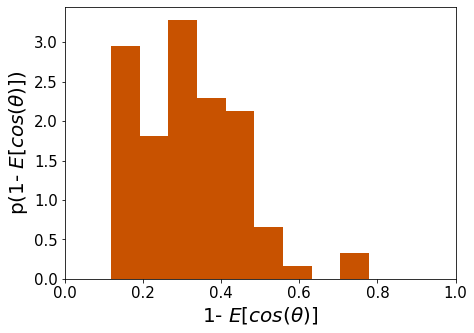


---------------

s: 1
<t>= 0.3016213902723124  std t= 0.13155300430277275


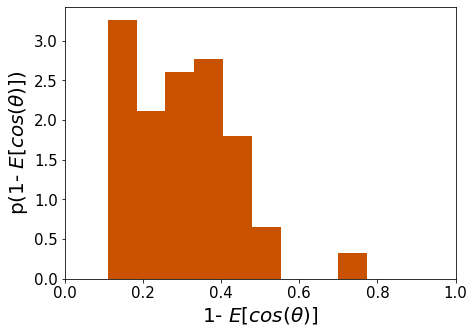


---------------

s: 2
<t>= 0.29038115016133514  std t= 0.13248103883125073


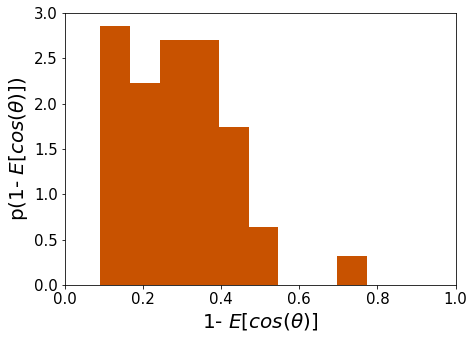


---------------

s: 3
<t>= 0.28099571453522326  std t= 0.13310854655293305


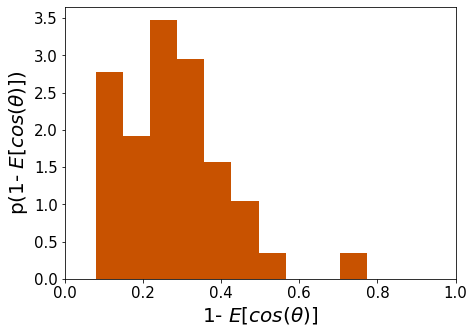


---------------

s: 4
<t>= 0.2729332855489882  std t= 0.13383682083707188


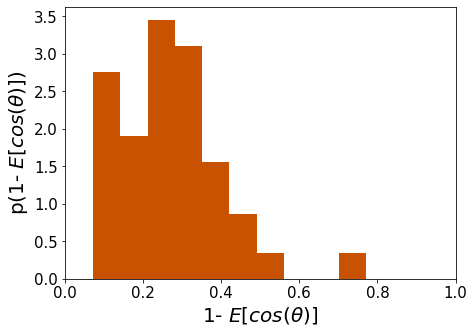


---------------

s: 5
<t>= 0.2656213723578258  std t= 0.13454457512181603


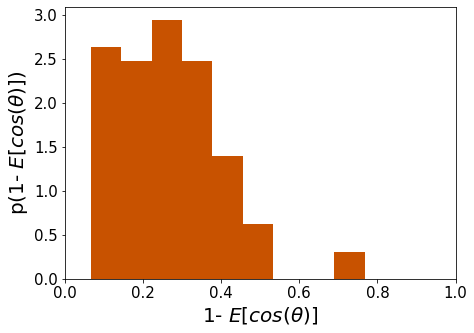


---------------



In [38]:
all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

list_s=[0,1,2,3,4,5]
for s in list_s:
    efficiency=[]
    for file in all_files:   # Loop for each user file (csv). 
        df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
        df2=df.copy() 

        if 'index' in df2:
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])
        df2.index = df2['time']
        del df2['time']
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)

        At=[]
        distance=[]
        for i in range(1,len(df2['time'])):
            At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
            distance.append(dist)

        At.insert(len(At), np.nan)
        distance.insert(len(distance), np.nan)

        df2['At']=At
        df2['d']=distance
        df2['v']=df2['d']/df2['At']

        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()

        reorientations=[]
        
        for i in range(1,len(latitude)-s):
            vectors=vector(latitude[i-1],longitude[i-1],latitude[i+s],longitude[i+s])  #movement vector
            vectors_straight=vector(latitude[i-1],longitude[i-1],latitude[-1],longitude[-1])  #straight vector
            reorientations.append(np.cos(abs(reorientation(vectors_straight,vectors)))) #reorientation
            reorientations2 = [x for x in reorientations if np.isnan(x) == False]  #avoid nan values

        efficiency.append(sum(reorientations2)/len(reorientations2))

    tortuosity=[]
    for i in range(len(efficiency)):
        tortuosity.append(1.-efficiency[i])
    
    print('s:',s)
    print('<t>=', np.mean(tortuosity),'', 'std t=',np.std(tortuosity))
    fig, ax1 = plt.subplots(figsize=(7,5)) 
    plt.hist(tortuosity, density=True,bins = 'auto', color='#C85200')
    plt.xlabel(r'1- $E[cos(\theta)]$',fontsize=20)
    plt.ylabel(r'p(1- $E[cos(\theta)])$',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax1.set_xlim(0,1)
    plt.show()
    print('')
    print('---------------')
    print('')

    

## 3.1- Comparision between the 3 most data-rich schools


We use only the data of:

    IFT (Institut Ferran Tallada: 6,170 GPS locs.)
    SGV (Sant Gabriel de Viladecans: 15,861 GPS locs)
    ZAF (Juan Manuel Zafra: 6,115 GPS locs).


In [40]:
all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

t_sgv=[]
t_ift=[]
t_zaf=[]
for file in all_files:   # Loop for each user file (csv). 
    df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
    df2=df.copy() 

    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])
    df2.index = df2['time']
    del df2['time']
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)

    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']

    latitude=df2['latitude'].tolist()
    longitude=df2['longitude'].tolist()


    reorientations=[]
    s=0
    for i in range(1,len(latitude)-s):
        vectors=vector(latitude[i-1],longitude[i-1],latitude[i+s],longitude[i+s])  #movement vector between "s" steps
        vectors_straight=vector(latitude[i-1],longitude[i-1],latitude[-1],longitude[-1])  #straight vector
        reorientations.append(np.cos(abs(reorientation(vectors_straight,vectors)))) #reorientation
        reorientations2 = [x for x in reorientations if np.isnan(x) == False]  #avoid nan values

    efficiency=sum(reorientations2)/len(reorientations2)
    tort=1.-efficiency

    if 'sgv' in file:
        t_sgv.append(tort)

    if 'ift' in file:
        t_ift.append(tort)

    if 'zaf' in file:
        t_zaf.append(tort)


print('SGV')
print('<t>=', np.mean(t_sgv),'+-',np.std(t_sgv)/np.sqrt(len(t_sgv)),'', 'std t=',np.std(t_sgv))
print('')
print('---------------')
print('')

print('IFT')
print('<t>=', np.mean(t_ift),'+-',np.std(t_ift)/np.sqrt(len(t_ift)),'', 'std t=',np.std(t_ift))
print('')
print('---------------')
print('')

print('ZAF')
print('<t>=', np.mean(t_zaf),'+-',np.std(t_zaf)/np.sqrt(len(t_zaf)),'', 'std t=',np.std(t_zaf))
print('')
print('---------------')
print('')



    

<ipython-input-7-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


SGV
<t>= 0.2933695529001779 +- 0.026555405692754077  std t= 0.1405179988549124

---------------

IFT
<t>= 0.3063138361334957 +- 0.03680011249608674  std t= 0.11637217363805831

---------------

ZAF
<t>= 0.3355578432879749 +- 0.029351868732446766  std t= 0.10582966774552502

---------------



# 4. Reorientation

We compute the reorientation (the change of the orientation or tuning angle) of the movement.

Note: We perform this operation for several values of "s", being "s" the number of steps between GPS locations. 
So, if s=0, we are obtaining the vectors (and the reorientation and tortuosity) between each consecutive GPS location (i and i+1). If s=1, we make a step in our data, so we compute the vector between the geo-locations separated by 2 seconds (between i and i+2). If s=2, we make two steps.. and so on. 

## 4.1- Instantaneous velocity vs Reorientation

<ipython-input-7-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)
C:\Users\josep\anaconda3\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


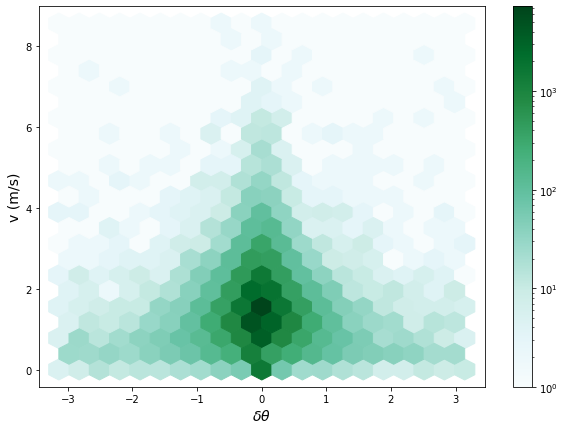

44496 44496


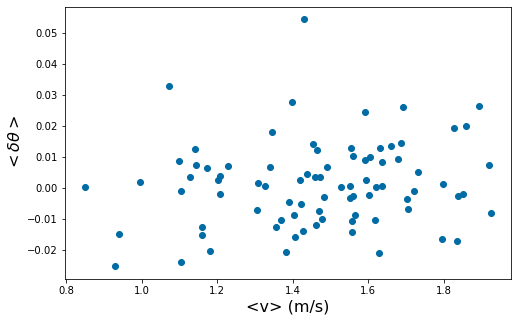

In [52]:
import glob, os
import scipy

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

reorientations_tots=[]
mean_v_tots=[]
mean_r_tots=[]
velocitats_tots=[]

for file in all_files:   # Loop for each user file (csv). 
    df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
    df2=df.copy() 

    if 'index' in df2:
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])
    df2.index = df2['time']
    del df2['time']
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()

    df2.reset_index(level=0, inplace=True)

    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']
    
    vel=df2['v'][~df2['v'].isnull()].tolist()
    
    v=df2['v'][:-2].tolist()

    latitude=df2['latitude'].tolist()
    longitude=df2['longitude'].tolist()
    
    vectors=[]
    for i in range(1,len(latitude)):
        vectors.append(vector(latitude[i-1],longitude[i-1],latitude[i],longitude[i]))   # Obtain all the vectors for that user
        
    reorientations=[]
    s=0
    for j in range(1,len(vectors)-s):          # Obtain the reorientations every "ss" points
        reorientations.append(reorientation(vectors[j-1],vectors[j+s]))
    
    reo_user=np.array(reorientations)
    reo_user= np.nan_to_num(reo_user, copy=True) 
    reorientations_tots.extend(reo_user)  # Put all the reorientations (for every user) in a unique list
    
    mean_v=sum(v)/len(v)
    mean_r=sum(reo_user)/len(reo_user)
    
    mean_v_tots.append(mean_v)
    mean_r_tots.append(mean_r)
    
    velocitats_tots.extend(v)
    

dff=pd.DataFrame()
dff['v']=velocitats_tots
dff['r']=reorientations_tots
    
fig,ax1=plt.subplots()
dff.plot.hexbin(x='r', y='v', bins='log',gridsize=20 ,figsize=(10,7),ax=ax1)
#dff.plot.hexbin(x='r', y='v',gridsize=50 ,figsize=(10,7),ax=ax1)
ax1.set_xlabel(r'$\delta \theta $', fontsize=14)
ax1.set_ylabel('v (m/s)', fontsize=14)

plt.show()


print(len(velocitats_tots), len(reorientations_tots))
fig, ax1 = plt.subplots(figsize=(8,5)) 

ax1.scatter(mean_v_tots,mean_r_tots)
ax1.set_xlabel('<v> (m/s)',fontsize=16)
ax1.set_ylabel(r'$<\delta \theta >$',fontsize=16)

plt.show()

## 4.2- Pdf. Fit with family of simmetric distributions

$\Large p(\theta)=\frac{(cosh(\kappa \phi)+sinh(\kappa \phi)cos(\theta - \mu))^{1/\phi}}{2\pi P_{1/\phi}(cosh(\kappa \phi)}$

### 4.2.1- Pdf with no interpolation

<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 1

kappa= 1.9050371435336366 +- 0.0093517459254666
phi= -0.9999999616416869 +- 4.867759716088719e-08
mu= -0.003061772941002917 +- 0.002096130285058332


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


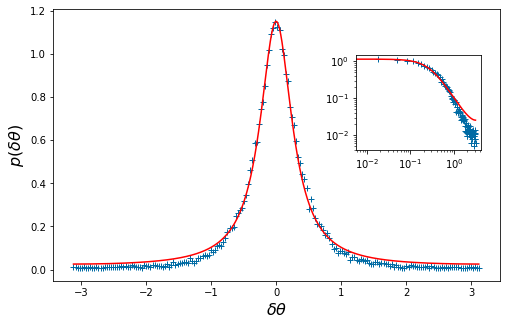


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 2

kappa= 1.9153221889052323 +- 0.015832904078306606
phi= -0.9382211034856359 +- 0.008797363487465758
mu= -0.0017042019907376187 +- 0.0018829568646039612


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


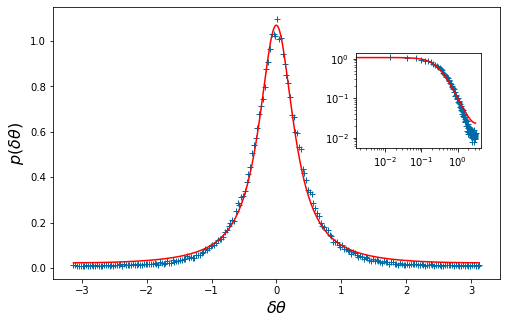


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 3

kappa= 2.098388600125955 +- 0.01104259728876177
phi= -0.6805550320306647 +- 0.009012106536584139
mu= -0.002482508455722986 +- 0.0012112331118098042


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


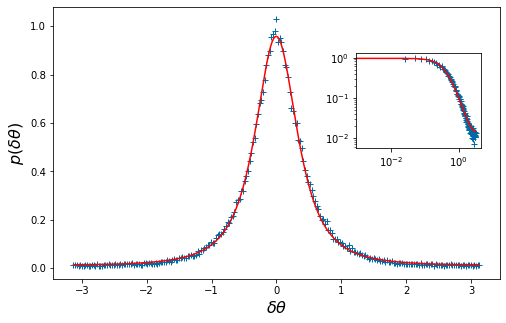


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 4

kappa= 2.0389474235995904 +- 0.009776538708443637
phi= -0.674756659473809 +- 0.008395173289459185
mu= -0.0028955330733052877 +- 0.0011667650837909394


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


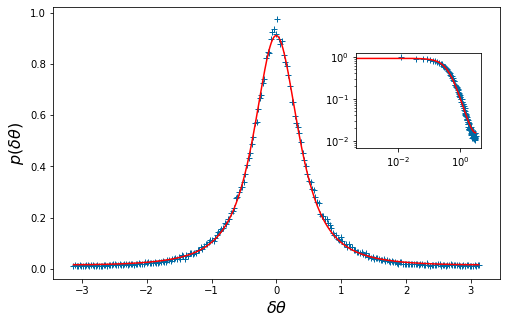


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 5

kappa= 1.983224411854932 +- 0.009730467494397424
phi= -0.6800298954008884 +- 0.008865349512747329
mu= -0.00282535132916802 +- 0.0012589800956861192


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


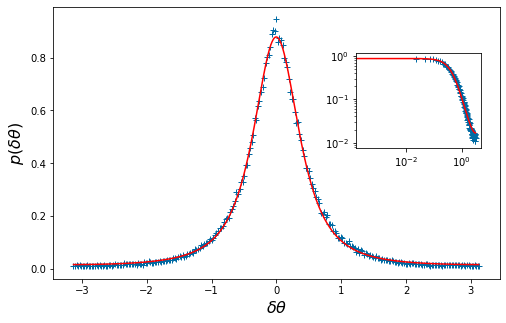


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 6

kappa= 1.9396007766445582 +- 0.008992709971115884
phi= -0.681667758768219 +- 0.008573718053804956
mu= -0.0031092670683906046 +- 0.0012399993583218885


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


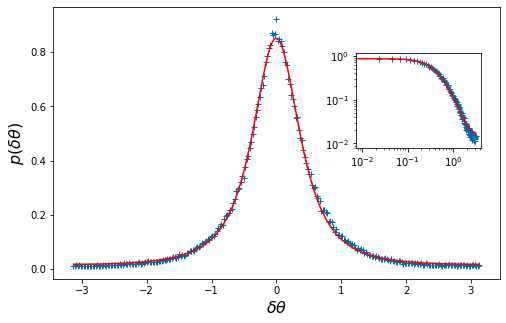


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 7

kappa= 1.8998500052180303 +- 0.009170462783301931
phi= -0.686040914075558 +- 0.009143658027696653
mu= -0.0032223801651932484 +- 0.0013409922863534573


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


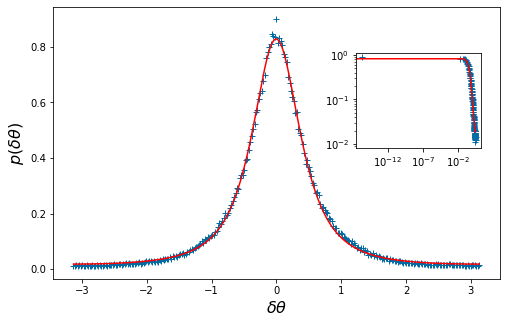


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 8

kappa= 1.8671840781650173 +- 0.008747104549581716
phi= -0.6868284351459503 +- 0.009033587233076078
mu= -0.003453544897173651 +- 0.0013424281711612684


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


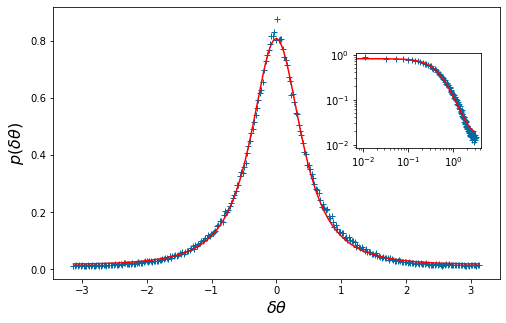


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 9

kappa= 1.8378333998926015 +- 0.008760413143021853
phi= -0.6883281431717363 +- 0.009349382150652199
mu= -0.0039053786832825566 +- 0.0014046176577711077


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


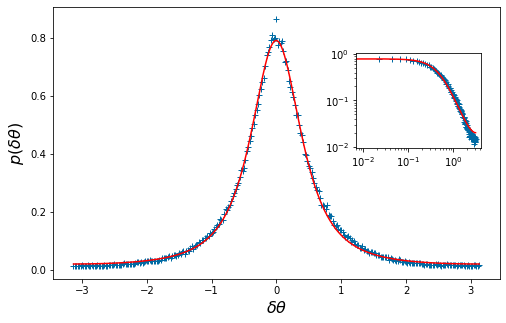


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 10

kappa= 1.8137125346245442 +- 0.008935903920274
phi= -0.6864061025575959 +- 0.009776554479696317
mu= -0.0038245414895551333 +- 0.0014849895615048233


<ipython-input-16-c20e88784129>:92: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-16-c20e88784129>:93: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


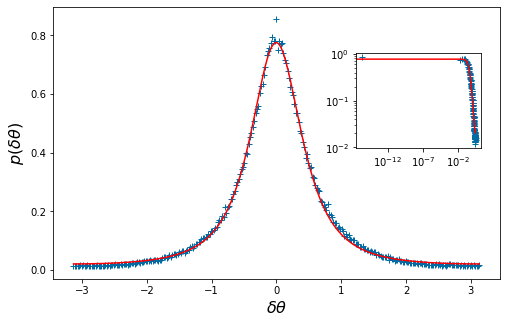


-------------------------



In [16]:
import glob, os
import scipy

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)


list_s=[1,2,3,4,5,6,7,8,9,10]
reorientations_tots_o=[]
kappa_o=[]
kappa_error_o=[]
phi_o=[]
phi_error_o=[]
mu_o=[]
mu_error_o=[]

for s in list_s:
    for file in all_files:   # Loop for each user file (csv). 
        df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
        df2=df.copy() 

        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()

        vectors=[]
        for i in range(1,len(latitude)):
            vectors.append(vector(latitude[i-1],longitude[i-1],latitude[i],longitude[i]))   # Obtain all the vectors for that user

        reorientations=[]
        for j in range(1,len(vectors)-s):          # Obtain the reorientations every "ss" points
            reorientations.append(reorientation(vectors[j-1],vectors[j+s]))

        reo_user=np.array(reorientations)
        reo_user= np.nan_to_num(reo_user, copy=True) 
        reorientations_tots_o.extend(reo_user)  # Put all the reorientations (for every user) in a unique list



    # PROBABILITY DENSITY FUNCTION REORIENTATION. FITTED WITH A FAMILY OF SIMETRIC DISTRIBUTIONS ON THE CIRCLE
    
    print('s=',s)
    print('')

    fig, ax1 = plt.subplots(figsize=(8,5)) 

    numpy_matrix = np.array(reorientations_tots_o)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

    #counts=counts.tolist()
    #bin_centres=bin_centres.tolist()
    #maxim_value=counts.index(max(counts))
    #del counts[maxim_value]
    #del bin_centres[maxim_value]

    ax1.plot(bin_centres, counts, '+', label='data')    #plot pdf
    ax1.set_xlabel(r'$\delta \theta$',fontsize=16)
    ax1.set_ylabel(r'$p(\delta \theta)$',fontsize=16)
    #ax1.set_ylim(0.0,1.2)


    def simetria(x, k, phi,mu):
        a=np.cosh(k*phi)
        b=np.sinh(k*phi)
        c=np.cos(x-mu)
        #d=float(legenp(1/phi,0,a))
        d=float(lpmv(0,1/phi,a))
        return ((a+(b*c))**(1/phi))/(2*np.pi*d)

    p0=(0,-1,-1)
    popt, pcov = curve_fit(simetria, bin_centres, counts,p0=p0)    # Fit using least-squares method
    times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
    model = simetria(times, *popt)
    perr = np.sqrt(np.diag(pcov))  # Error of the fit parameters
    ax1.plot(times, model, '-r',label='Jones-Pewsey')

    axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.62,1-0.50,.35,.35), bbox_transform=ax1.transAxes)
    axins2.plot(bin_centres, counts, '+', label='data')
    axins2.plot(times, model, '-r', label='fit')
    axins2.set_yscale('log',basey=10)
    axins2.set_xscale('log',basex=10)

    
    print('kappa=', popt[0], '+-', perr[0])
    print('phi=', popt[1], '+-', perr[1])
    print('mu=', popt[2], '+-', perr[2])
    
    kappa_o.append(popt[0])
    kappa_error_o.append(perr[0])
    
    phi_o.append(popt[1])
    phi_error_o.append(perr[1])
    
    mu_o.append(popt[2])
    mu_error_o.append(perr[2])

    
    plt.show()
    
    print('')
    print('-------------------------')
    print('')
    

### 4.2.2- Pdf with interpolation

<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 1

kappa= 1.913475821074903 +- 0.048732568632152196
phi= -0.9999999771781339 +- 1.3842050405193434e-07
mu= -0.004367682955977741 +- 0.0108211917586035


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


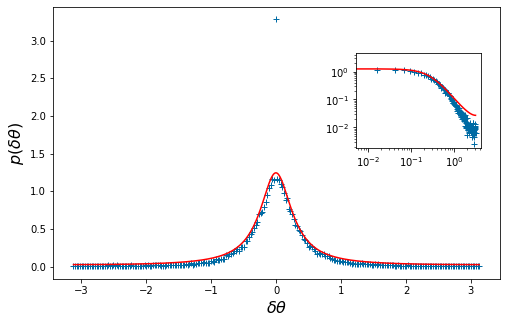


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 2

kappa= 2.2271772240373777 +- 0.09450335288528845
phi= -0.8000479976104079 +- 0.04096589114823952
mu= -0.0029638022075432046 +- 0.007431170739109214


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


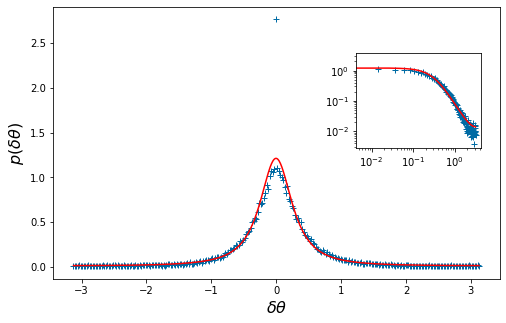


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 3

kappa= 1.9091933035355686 +- 0.027948894345147402
phi= -0.9999999843200142 +- 6.009216364157746e-08
mu= -0.0005119678838440856 +- 0.006236057676405177


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


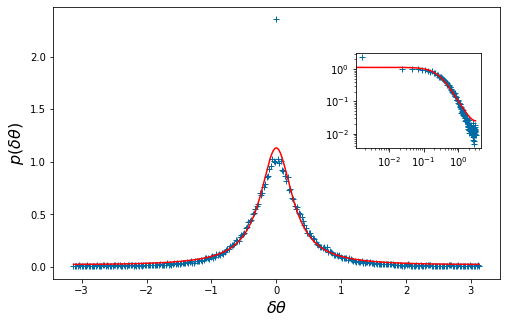


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 4

kappa= 1.8597255289809316 +- 0.022354319407157302
phi= -0.9999879229860549 +- 4.002683162718016e-05
mu= 0.000391991567948589 +- 0.005281230106479981


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


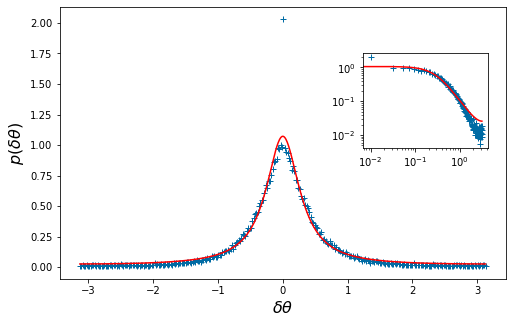


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 5

kappa= 1.8534019528823034 +- 0.04023424239056793
phi= -0.9714881772638407 +- 0.026487262224372674
mu= 0.0005136793983960837 +- 0.004811177576581775


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


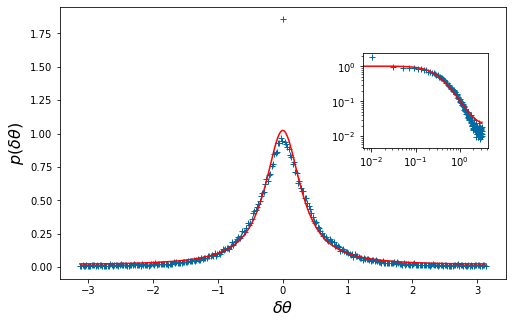


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 6

kappa= 1.9408088753992376 +- 0.034000496751047694
phi= -0.8140459855257255 +- 0.03623240727246256
mu= -3.379134050671564e-05 +- 0.004716113228946879


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


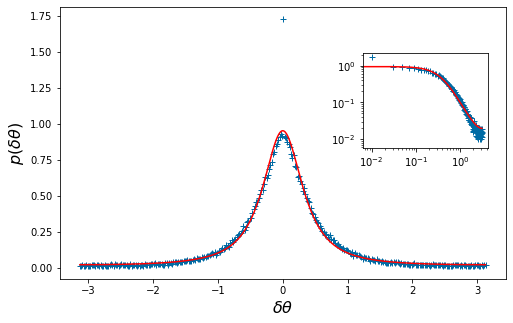


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 7

kappa= 1.9040617826866753 +- 0.030127953538684533
phi= -0.8087747008057882 +- 0.033141802235216705
mu= -0.0004522818405418701 +- 0.004413030145718548


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


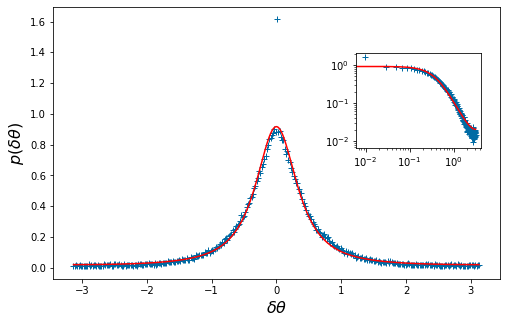


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 8

kappa= 1.8720569994591056 +- 0.028486958091903564
phi= -0.8049646880441754 +- 0.03226021664933516
mu= -0.0017148980227832114 +- 0.004376376691968436


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


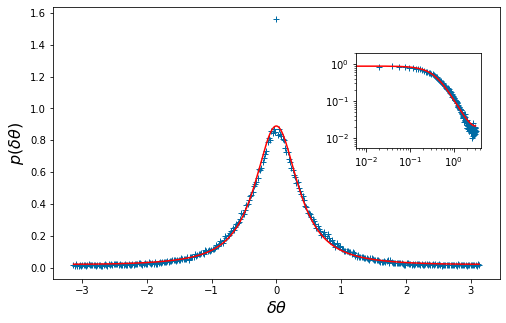


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 9

kappa= 1.8429682742277906 +- 0.025219294455535335
phi= -0.8024308055221274 +- 0.029363694440271395
mu= -0.0012001607829661973 +- 0.004046633544476218


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


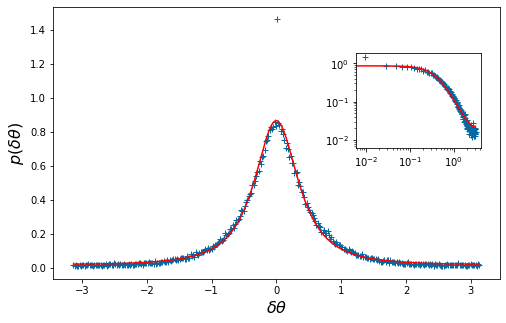


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 10

kappa= 1.8177008938398815 +- 0.023376709400226663
phi= -0.7976984399973757 +- 0.027843076670289506
mu= -0.0014139466762361965 +- 0.003895714633185845


<ipython-input-17-1afb0d63109b>:125: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-17-1afb0d63109b>:126: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


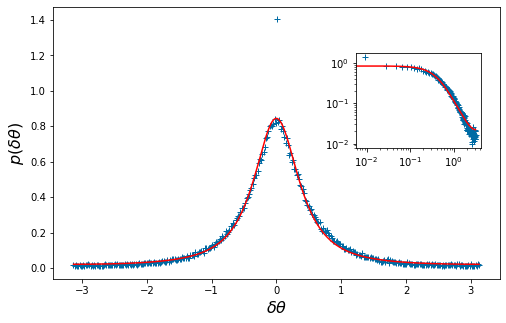


-------------------------



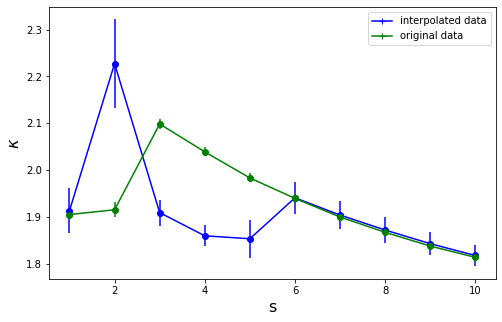

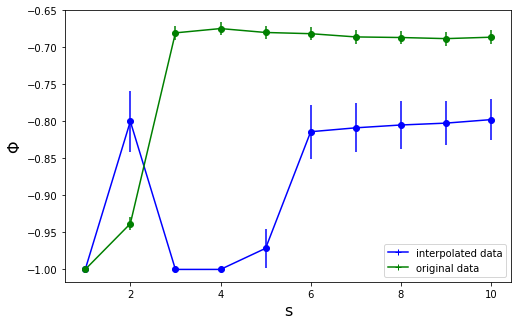

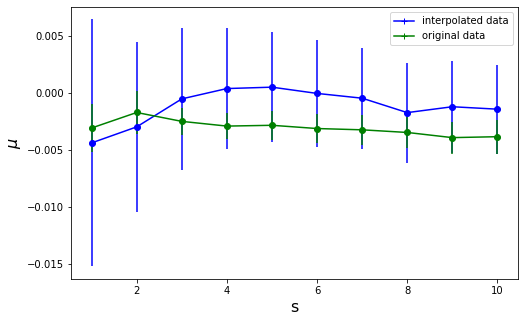

In [17]:
import glob, os
import scipy

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)


list_s=[1,2,3,4,5,6,7,8,9,10]
reorientations_tots=[]
kappa=[]
kappa_error=[]
phi=[]
phi_error=[]
mu=[]
mu_error=[]

for s in list_s:
    for file in all_files:   # Loop for each user file (csv). 
        df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
        df2=df.copy() 

        if 'index' in df2:
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])
        df2.index = df2['time']
        del df2['time']
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        df2=df2.resample('1S').asfreq().interpolate()

        df2.reset_index(level=0, inplace=True)

        At=[]
        distance=[]
        for i in range(1,len(df2['time'])):
            At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
            distance.append(dist)

        At.insert(len(At), np.nan)
        distance.insert(len(distance), np.nan)

        df2['At']=At
        df2['d']=distance
        df2['v']=df2['d']/df2['At']

        vel=df2['v'][~df2['v'].isnull()].tolist()

        v=df2['v'][:-2].tolist()

        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()

        vectors=[]
        for i in range(1,len(latitude)):
            vectors.append(vector(latitude[i-1],longitude[i-1],latitude[i],longitude[i]))   # Obtain all the vectors for that user

        reorientations=[]
        for j in range(1,len(vectors)-s):          # Obtain the reorientations every "ss" points
            reorientations.append(reorientation(vectors[j-1],vectors[j+s]))

        reo_user=np.array(reorientations)
        reo_user= np.nan_to_num(reo_user, copy=True) 
        reorientations_tots.extend(reo_user)  # Put all the reorientations (for every user) in a unique list



    # PROBABILITY DENSITY FUNCTION REORIENTATION. FITTED WITH A FAMILY OF SIMETRIC DISTRIBUTIONS ON THE CIRCLE
    
    print('s=',s)
    print('')

    fig, ax1 = plt.subplots(figsize=(8,5)) 

    numpy_matrix = np.array(reorientations_tots)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

    counts=counts.tolist()
    bin_centres=bin_centres.tolist()
    maxim_value=counts.index(max(counts))
    #del counts[maxim_value]
    #del bin_centres[maxim_value]

    ax1.plot(bin_centres, counts, '+', label='data')    #plot pdf
    ax1.set_xlabel(r'$\delta \theta$',fontsize=16)
    ax1.set_ylabel(r'$p(\delta \theta)$',fontsize=16)
    #ax1.set_ylim(0.0,1.2)


    def simetria(x, k, phi,mu):
        a=np.cosh(k*phi)
        b=np.sinh(k*phi)
        c=np.cos(x-mu)
        #d=float(legenp(1/phi,0,a))
        d=float(lpmv(0,1/phi,a))
        return ((a+(b*c))**(1/phi))/(2*np.pi*d)

    p0=(0,-1,-1)
    popt, pcov = curve_fit(simetria, bin_centres, counts,p0=p0)    # Fit using least-squares method
    times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
    model = simetria(times, *popt)
    perr = np.sqrt(np.diag(pcov))  # Error of the fit parameters
    ax1.plot(times, model, '-r',label='Jones-Pewsey')

    axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.62,1-0.50,.35,.35), bbox_transform=ax1.transAxes)
    axins2.plot(bin_centres, counts, '+', label='data')
    axins2.plot(times, model, '-r', label='fit')
    axins2.set_yscale('log',basey=10)
    axins2.set_xscale('log',basex=10)

    
    print('kappa=', popt[0], '+-', perr[0])
    print('phi=', popt[1], '+-', perr[1])
    print('mu=', popt[2], '+-', perr[2])
    
    kappa.append(popt[0])
    kappa_error.append(perr[0])
    
    phi.append(popt[1])
    phi_error.append(perr[1])
    
    mu.append(popt[2])
    mu_error.append(perr[2])

    
    plt.show()
    
    print('')
    print('-------------------------')
    print('')
    
    
fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, kappa, '+-', label='interpolated data',c='blue')    #plot pdf
plt.errorbar(list_s, kappa,yerr =kappa_error,fmt ='o',c='blue')
ax1.plot(list_s, kappa_o, '+-', label='original data',c='green')    #plot pdf
plt.errorbar(list_s, kappa_o,yerr =kappa_error_o,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\kappa$',fontsize=16)
ax1.legend()
plt.show()

    
fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, phi, '+-', label='interpolated data',c='blue')    #plot pdf
plt.errorbar(list_s, phi,yerr =phi_error,fmt ='o',c='blue')
ax1.plot(list_s, phi_o, '+-', label='original data',c='green')    #plot pdf
plt.errorbar(list_s, phi_o,yerr =phi_error_o,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\Phi$',fontsize=16)
ax1.legend()
plt.show()

    
fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, mu, '+-', label='interpolated data',c='blue')    #plot pdf
plt.errorbar(list_s, mu,yerr =mu_error,fmt ='o', c='blue')
ax1.plot(list_s, mu_o, '+-', label='original data',c='green')    #plot pdf
plt.errorbar(list_s, mu_o,yerr =mu_error_o,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\mu$',fontsize=16)
ax1.legend()
plt.show()

## 4.3- Comparision between the 3 most data-rich schools

<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 1


---------

SGV:
kappa= 1.9113065437334589 +- 0.04461669558803907
phi= -0.9999999631193315 +- 2.0925428510769662e-07
mu= -0.003878246054644521 +- 0.009929659118322866

---------

IFT:
kappa= 1.8832700885828386 +- 0.023651187155410546
phi= -0.9999990164203818 +- 3.268074330322586e-06
mu= -0.0026085420998192546 +- 0.005428686258153927

---------

ZAF:
kappa= 1.9085520601786516 +- 0.08423110568522009
phi= -0.9999999730829718 +- 3.0410947014668485e-07
mu= 0.014418428601696872 +- 0.018805014377010154


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


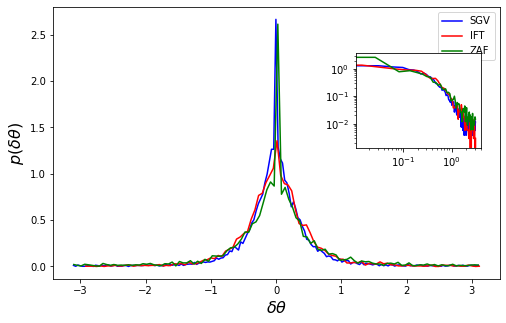


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 2


---------

SGV:
kappa= 1.9113561855003296 +- 0.03121702954373565
phi= -0.999999973996279 +- 1.0456744745668565e-07
mu= -0.0037500026748415434 +- 0.006948113747041068

---------

IFT:
kappa= 2.3739845437464147 +- 0.05659741749404479
phi= -0.5541304476901113 +- 0.03200296438758125
mu= -0.0010145388636902367 +- 0.004205627697557609

---------

ZAF:
kappa= 1.9174787867141225 +- 0.06552076994442553
phi= -0.999999997129899 +- 2.4209911467705783e-08
mu= 0.012690811693178913 +- 0.014482527004222092


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


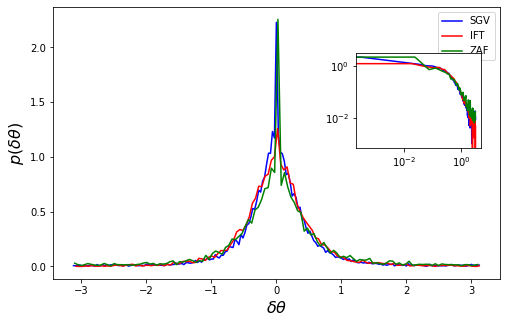


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 3


---------

SGV:
kappa= 1.9070740630124232 +- 0.022193836354938955
phi= -0.9999999688413964 +- 9.390289943467859e-08
mu= -0.006179212357409359 +- 0.004963612555525308

---------

IFT:
kappa= 2.344066610792036 +- 0.044696308786030134
phi= -0.5157280887807539 +- 0.024885828878333606
mu= -0.001654817722586195 +- 0.0034386990055498014

---------

ZAF:
kappa= 1.8553446330266614 +- 0.05196368980613417
phi= -0.9999955618896387 +- 4.582161735023545e-05
mu= -0.0020817430795254913 +- 0.01232731920983274


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


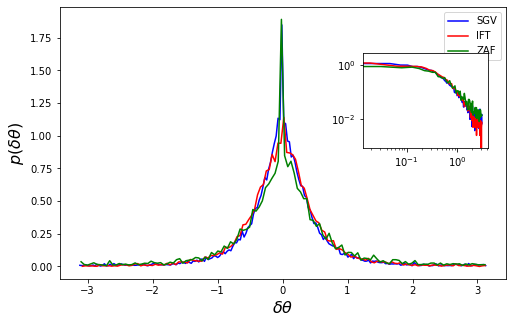


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 4


---------

SGV:
kappa= 1.8927441121753483 +- 0.019097362348195132
phi= -0.9999998380464795 +- 4.44464541181542e-07
mu= -0.004539685542588894 +- 0.004340346851616777

---------

IFT:
kappa= 2.30657980876896 +- 0.04350520686998267
phi= -0.49026128321024276 +- 0.02436097297551048
mu= -0.0027867289487369237 +- 0.0035053990974602345

---------

ZAF:
kappa= 1.7837576998678393 +- 0.05424089670208444
phi= -0.9997078483174692 +- 0.08202195021845417
mu= -0.0005586592384139428 +- 0.011746832904691605


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


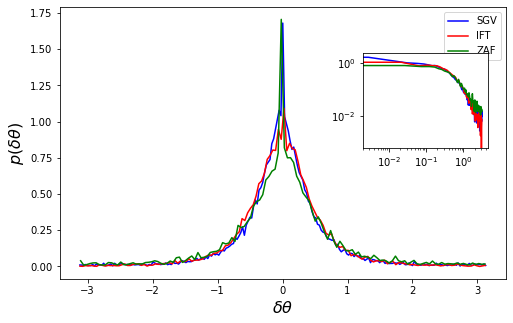


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 5


---------

SGV:
kappa= 1.9185447744894213 +- 0.03171614595293365
phi= -0.9359869353666759 +- 0.01768529639866589
mu= -0.006452272977563835 +- 0.0037385626128184253

---------

IFT:
kappa= 2.2592236205744967 +- 0.03918455173742215
phi= -0.4841998482746684 +- 0.02274892681924308
mu= -0.002481405673203042 +- 0.0033596290839079624

---------

ZAF:
kappa= 1.732773810699551 +- 0.053628320659736384
phi= -0.9898957280102958 +- 0.08066723597096745
mu= 0.005765101668537849 +- 0.010189627187927704


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


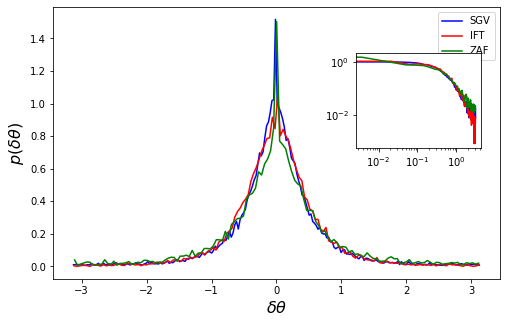


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 6


---------

SGV:
kappa= 1.8593465160159655 +- 0.028499497244078114
phi= -0.9684562085119655 +- 0.01819316512410113
mu= -0.00704386272761127 +- 0.0034395676484289175

---------

IFT:
kappa= 2.231023304831437 +- 0.03513732494341009
phi= -0.46840310618845626 +- 0.02059640481438183
mu= -0.002898801969398295 +- 0.0031198468710052244

---------

ZAF:
kappa= 1.7000520670981376 +- 0.047758415396850204
phi= -0.9529497042217395 +- 0.07243358096205178
mu= 0.0062249284745597875 +- 0.00955787103774772


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


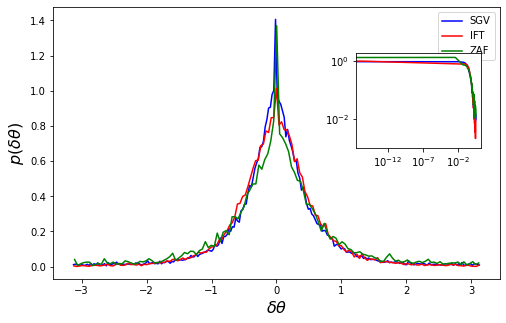


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 7


---------

SGV:
kappa= 1.9929646106189423 +- 0.025983559587488644
phi= -0.7696866945569675 +- 0.025360292581923502
mu= -0.006715443144705227 +- 0.0033334183966284878

---------

IFT:
kappa= 2.2007983558962625 +- 0.03232614784325105
phi= -0.4624458067586207 +- 0.019375851803070963
mu= -0.002873191073070338 +- 0.0029863611552232248

---------

ZAF:
kappa= 1.6698119854823972 +- 0.047507852593973325
phi= -0.9172059289828061 +- 0.07261835800660987
mu= 0.003010114778212622 +- 0.0099670509974145


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


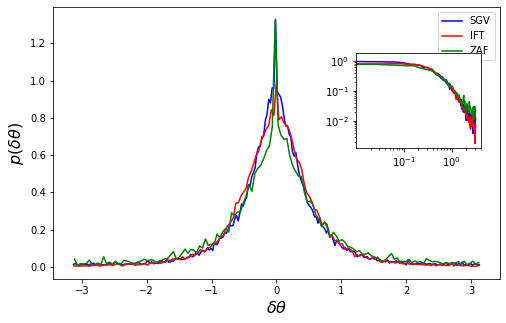


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 8


---------

SGV:
kappa= 1.9608425188798104 +- 0.023902752226974647
phi= -0.7638651521706662 +- 0.023943847060028008
mu= -0.006957495693050573 +- 0.0032134760204487393

---------

IFT:
kappa= 2.163574871302325 +- 0.028705155239702566
phi= -0.46754361143855294 +- 0.017925039853019232
mu= -0.0025984931805514504 +- 0.0027928212646676767

---------

ZAF:
kappa= 1.6422276121064083 +- 0.04329556428676327
phi= -0.8991971206882691 +- 0.06741727043061496
mu= 0.0029260803296316264 +- 0.009480705633228191


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


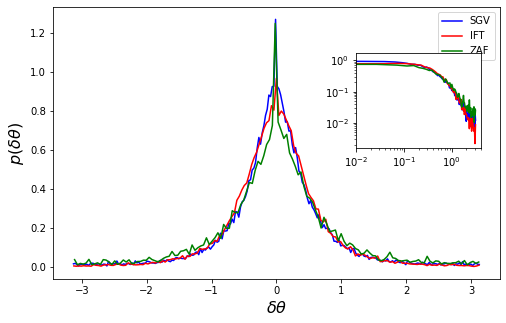


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 9


---------

SGV:
kappa= 1.9304870962490845 +- 0.0223792726388538
phi= -0.7631229487641851 +- 0.023085329998434746
mu= -0.006498109716552062 +- 0.0031461856189454684

---------

IFT:
kappa= 2.139873890157588 +- 0.026655117608815216
phi= -0.46429253743379173 +- 0.0169794738112178
mu= -0.002728163218231342 +- 0.00267733121987473

---------

ZAF:
kappa= 1.6160033011328983 +- 0.039705045807647846
phi= -0.8834842476813543 +- 0.06303891730666518
mu= 0.003983755632325927 +- 0.009054974500497545


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


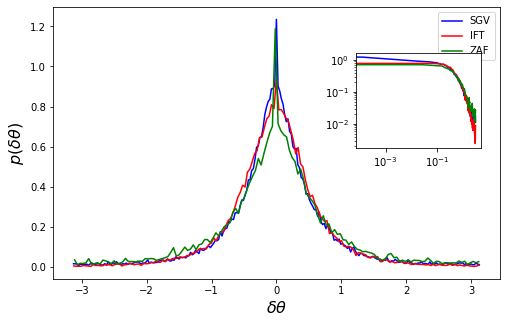


-------------------------



<ipython-input-11-eb8d10aab1c6>:106: RuntimeWarning: invalid value encountered in arccos
  a=np.arccos(dot_product)


s= 10


---------

SGV:
kappa= 1.905482139413899 +- 0.020242684307107336
phi= -0.7585558279336985 +- 0.021330086916605647
mu= -0.007492987839072202 +- 0.002952255000269961

---------

IFT:
kappa= 2.120176633924774 +- 0.024415441271543756
phi= -0.4598072299722956 +- 0.01578880662406672
mu= -0.003031683056660396 +- 0.0025175156973354152

---------

ZAF:
kappa= 1.5927718381408764 +- 0.032771462097405016
phi= -0.8635987824428033 +- 0.052761008600494735
mu= 0.008002519417674065 +- 0.007745877388850404


<ipython-input-24-21bb210ca85a>:111: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-24-21bb210ca85a>:112: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


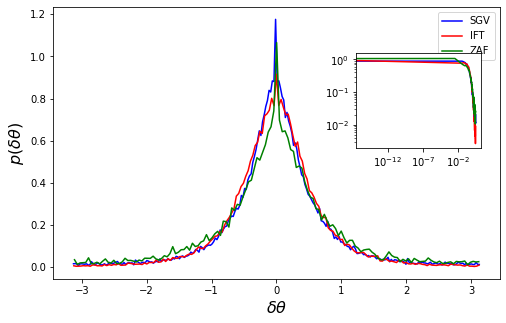


-------------------------



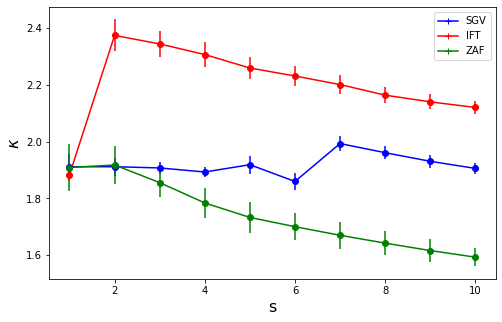

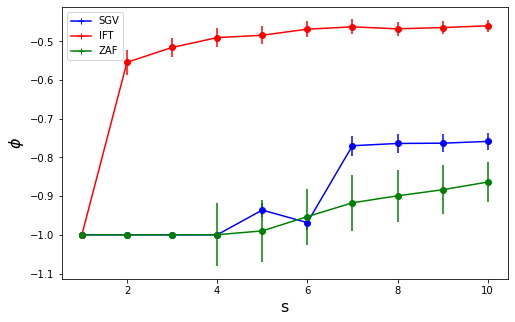

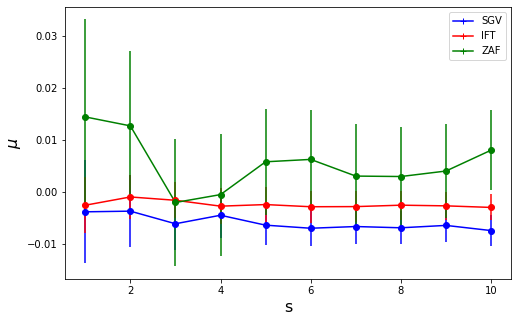

In [24]:
import glob, os
import scipy

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)


list_s=[1,2,3,4,5,6,7,8,9,10]
reorientations_sgv=[]
reorientations_ift=[]
reorientations_zaf=[]
kappa_sgv=[]
kappa_sgv_error=[]
phi_sgv=[]
phi_sgv_error=[]
mu_sgv=[]
mu_sgv_error=[]
kappa_ift=[]
kappa_ift_error=[]
phi_ift=[]
phi_ift_error=[]
mu_ift=[]
mu_ift_error=[]
kappa_zaf=[]
kappa_zaf_error=[]
phi_zaf=[]
phi_zaf_error=[]
mu_zaf=[]
mu_zaf_error=[]

for s in list_s:
    for file in all_files:   # Loop for each user file (csv). 
        df = pd.read_csv(file) # Read the file and get latitude and longitude into lists.
        df2=df.copy() 

        if 'index' in df2:
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])
        df2.index = df2['time']
        del df2['time']
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        df2=df2.resample('1S').asfreq().interpolate()

        df2.reset_index(level=0, inplace=True)

        At=[]
        distance=[]
        for i in range(1,len(df2['time'])):
            At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
            distance.append(dist)

        At.insert(len(At), np.nan)
        distance.insert(len(distance), np.nan)

        df2['At']=At
        df2['d']=distance
        df2['v']=df2['d']/df2['At']

        vel=df2['v'][~df2['v'].isnull()].tolist()

        v=df2['v'][:-2].tolist()

        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()

        vectors=[]
        for i in range(1,len(latitude)):
            vectors.append(vector(latitude[i-1],longitude[i-1],latitude[i],longitude[i]))   # Obtain all the vectors for that user

        reorientations=[]
        for j in range(1,len(vectors)-s):          # Obtain the reorientations every "ss" points
            reorientations.append(reorientation(vectors[j-1],vectors[j+s]))

        reo_user=np.array(reorientations)
        reo_user= np.nan_to_num(reo_user, copy=True) 
        
        if 'sgv' in file:
            reorientations_sgv.extend(reo_user)  # Put all the reorientations (for every user) in a unique list
    
        if 'ift' in file:
            reorientations_ift.extend(reo_user)  # Put all the reorientations (for every user) in a unique list
            
        if 'zaf' in file:
            reorientations_zaf.extend(reo_user)  # Put all the reorientations (for every user) in a unique list

    # PROBABILITY DENSITY FUNCTION REORIENTATION. FITTED WITH A FAMILY OF SIMETRIC DISTRIBUTIONS ON THE CIRCLE
    
    print('s=',s)
    print('')

    fig, ax1 = plt.subplots(figsize=(8,5)) 
    axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.62,1-0.50,.35,.35), bbox_transform=ax1.transAxes)
    axins2.set_yscale('log',basey=10)
    axins2.set_xscale('log',basex=10)
    ax1.set_xlabel(r'$\delta \theta$',fontsize=16)
    ax1.set_ylabel(r'$p(\delta \theta)$',fontsize=16)
    
                   
                   
    numpy_matrix = np.array(reorientations_sgv)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

    #counts=counts.tolist()
    #bin_centres=bin_centres.tolist()
    #maxim_value=counts.index(max(counts))
    #del counts[maxim_value]
    #del bin_centres[maxim_value]

    ax1.plot(bin_centres, counts, '-', label='SGV',c='blue')    #plot pdf)
    #ax1.set_ylim(0.0,1.2)


    def simetria(x, k, phi,mu):
        a=np.cosh(k*phi)
        b=np.sinh(k*phi)
        c=np.cos(x-mu)
        #d=float(legenp(1/phi,0,a))
        d=float(lpmv(0,1/phi,a))
        return ((a+(b*c))**(1/phi))/(2*np.pi*d)

    p0=(0,-1,-1)
    popt, pcov = curve_fit(simetria, bin_centres, counts,p0=p0)    # Fit using least-squares method
    times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
    model = simetria(times, *popt)
    perr = np.sqrt(np.diag(pcov))  # Error of the fit parameters
    #ax1.plot(times, model, '-r',label='Jones-Pewsey')


    axins2.plot(bin_centres, counts, '-', label='data', c='blue')
    #axins2.plot(times, model, '-r', label='fit')

    
    print('')
    print('---------')
    print('')
    print('SGV:')
    print('kappa=', popt[0], '+-', perr[0])
    print('phi=', popt[1], '+-', perr[1])
    print('mu=', popt[2], '+-', perr[2])
    
    kappa_sgv.append(popt[0])
    kappa_sgv_error.append(perr[0])
    
    phi_sgv.append(popt[1])
    phi_sgv_error.append(perr[1])
    
    mu_sgv.append(popt[2])
    mu_sgv_error.append(perr[2])
    
    
    
    
    
    numpy_matrix = np.array(reorientations_ift)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

    ax1.plot(bin_centres, counts, '-', label='IFT',color='red')    #plot pdf

    p0=(0,-1,-1)
    popt, pcov = curve_fit(simetria, bin_centres, counts,p0=p0)    # Fit using least-squares method
    times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
    model = simetria(times, *popt)
    perr = np.sqrt(np.diag(pcov))  # Error of the fit parameters
    #ax1.plot(times, model, '-r',label='Jones-Pewsey')

    axins2.plot(bin_centres, counts, '-', label='data', c='red')
    #axins2.plot(times, model, '-r', label='fit')

    
    print('')
    print('---------')
    print('')
    print('IFT:')
    print('kappa=', popt[0], '+-', perr[0])
    print('phi=', popt[1], '+-', perr[1])
    print('mu=', popt[2], '+-', perr[2])
    
    kappa_ift.append(popt[0])
    kappa_ift_error.append(perr[0])
    
    phi_ift.append(popt[1])
    phi_ift_error.append(perr[1])
    
    mu_ift.append(popt[2])
    mu_ift_error.append(perr[2])
                   


    numpy_matrix = np.array(reorientations_zaf)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center

    ax1.plot(bin_centres, counts, '-', label='ZAF',c='green')    #plot pdf
    #ax1.set_ylim(0.0,1.2)

    p0=(0,-1,-1)
    popt, pcov = curve_fit(simetria, bin_centres, counts,p0=p0)    # Fit using least-squares method
    times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
    model = simetria(times, *popt)
    perr = np.sqrt(np.diag(pcov))  # Error of the fit parameters
    #ax1.plot(times, model, '-r',label='Jones-Pewsey')

    axins2.plot(bin_centres, counts, '-', label='data', c='green')
    #axins2.plot(times, model, '-r', label='fit')

    print('')
    print('---------')
    print('')
    print('ZAF:')
    print('kappa=', popt[0], '+-', perr[0])
    print('phi=', popt[1], '+-', perr[1])
    print('mu=', popt[2], '+-', perr[2])
    
    kappa_zaf.append(popt[0])
    kappa_zaf_error.append(perr[0])
    
    phi_zaf.append(popt[1])
    phi_zaf_error.append(perr[1])
    
    mu_zaf.append(popt[2])
    mu_zaf_error.append(perr[2])
    
    ax1.legend()
    
    plt.show()
    
    print('')
    print('-------------------------')
    print('')
    
    
fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, kappa_sgv, '+-', label='SGV',c='blue')    #plot pdf
plt.errorbar(list_s, kappa_sgv,yerr =kappa_sgv_error,fmt ='o',c='blue')
ax1.plot(list_s, kappa_ift, '+-', label='IFT',c='red')    #plot pdf
plt.errorbar(list_s, kappa_ift,yerr =kappa_ift_error,fmt ='o',c='red')
ax1.plot(list_s, kappa_zaf, '+-', label='ZAF',c='green')    #plot pdf
plt.errorbar(list_s, kappa_zaf,yerr =kappa_zaf_error,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\kappa$',fontsize=16)
ax1.legend()
plt.show()

    
fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, phi_sgv, '+-', label='SGV',c='blue')    #plot pdf
plt.errorbar(list_s, phi_sgv,yerr =phi_sgv_error,fmt ='o',c='blue')
ax1.plot(list_s, phi_ift, '+-', label='IFT',c='red')    #plot pdf
plt.errorbar(list_s, phi_ift,yerr =phi_ift_error,fmt ='o',c='red')
ax1.plot(list_s, phi_zaf, '+-', label='ZAF',c='green')    #plot pdf
plt.errorbar(list_s, phi_zaf,yerr =phi_zaf_error,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\phi$',fontsize=16)
ax1.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(list_s, mu_sgv, '+-', label='SGV',c='blue')    #plot pdf
plt.errorbar(list_s, mu_sgv,yerr =mu_sgv_error,fmt ='o',c='blue')
ax1.plot(list_s, mu_ift, '+-', label='IFT',c='red')    #plot pdf
plt.errorbar(list_s, mu_ift,yerr =mu_ift_error,fmt ='o',c='red')
ax1.plot(list_s, mu_zaf, '+-', label='ZAF',c='green')    #plot pdf
plt.errorbar(list_s, mu_zaf,yerr =mu_zaf_error,fmt ='o',c='green')
ax1.set_xlabel(r's',fontsize=16)
ax1.set_ylabel(r'$\mu$',fontsize=16)
ax1.legend()
plt.show()